In [ ]:
# Installing required libraries
#pip install numpy pandas matplotlib seaborn scikit-learn nbimporter

In [1]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

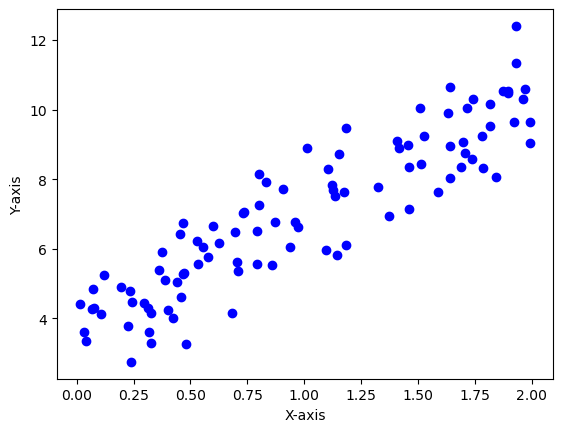

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.scatter(X, y, color='blue')
# Adding labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

In [3]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.73897186]), array([[3.29946498]]))

In [ ]:
class LinearRegression:

    def __init__(self, lr = 0.001, n_iters = 1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    
    def fit(self, X,y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias 
            dw = (1/n_samples) * np.dot(X.T, (y_predicted-y))
            db = (1/n_samples) * np.sum(y_predicted-y)

            self.weights -= self.lr*dw
            self.bias -= self.lr*db

    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted 
